In [1]:
from bertopic import BERTopic
from src.embedder import LatinEmbedder
from sklearn.feature_extraction.text import CountVectorizer
from cltk.stops.words import Stops
from cltk.tokenizers.lat.lat import LatinWordTokenizer
from cltk.lemmatize.lat import LatinBackoffLemmatizer
from tqdm.notebook import tqdm
from src.embedder import load_document_embeddings
from src.corpus import load_corpus, download_corpus
import pandas as pd


documents = load_corpus()

# We've already created document embeddings, so load those
embeddings = load_document_embeddings(documents, 'src/doc_embeddings_all.npy')
documents = [doc for doc in documents if not not embeddings[doc[1]].any()]

# Get dates and filter those without
dates = pd.read_csv('LatLibDates-Filtered.csv')
documents_with_dates = []
all_dates = []

for doc in documents:
    title = doc[0][39:] # Chop off the file name
    if (dates['V1'] == title).any():
        date = dates[dates['V1'] == title].values[0][1]
        if date <= 13:
            # Convert the integer to the actual year, using negative numbers for BC
            date = -700 + date * 100
            all_dates.append(date)
            documents_with_dates.append(doc)
    else:
        print(f"Couldn't find {title}")

# Tokenize and lemmatize
tokenizer = LatinWordTokenizer()
lemmatizer = LatinBackoffLemmatizer()

tokenized_documents = []
tokenized_embedding_map = dict()
for document in tqdm(documents_with_dates):
    tokenized = [lemma[1] for lemma in lemmatizer.lemmatize(tokenizer.tokenize(document[1]))]
    tokenized = ' '.join(tokenized)
    tokenized_documents.append(tokenized)
    tokenized_embedding_map[tokenized] = embeddings[document[1]]

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.
Loading corpus...
Loaded 2141 texts.
Couldn't find epistaustras.txt
Couldn't find asserius.txt
Couldn't find appverg.catalepton.txt
Couldn't find xanten.txt
Couldn't find fragmentumlaurentianum.txt
Couldn't find dares1.txt
Couldn't find inscriptions.txt
Couldn't find appvergculex.txt
Couldn't find epitaphs.txt
Couldn't find cato.dis.txt
Couldn't find pulchracomis.txt
Couldn't find hymni.txt
Couldn't find baldo.txt
Couldn't find columba2.txt
Couldn't find diravi.txt
Couldn't find lucernarium.txt
Couldn't find appvergcomp.txt
Couldn't find carmenarvale.txt
Couldn't find columba1.txt
Couldn't find valesianus1.txt
Couldn't find index.txt
Couldn't find nivis.txt
Couldn't find carmensaliare.txt
Couldn't find dares.txt
Couldn't find appverg.aetna.txt
Couldn't find valesianus2.txt
Couldn't find appverg.ciris.txt
Cou

  0%|          | 0/1349 [00:00<?, ?it/s]

In [2]:
import random

random.seed(0)

vectorizer = CountVectorizer(
    stop_words=Stops(iso_code='lat').stops + ['punc', 'quod', 'se', 'sunt', 'esse', 'tibi', 'mihi', 'te', 'quid', 'me', 'hoc', 'cum2', 'meus', 'tuus', 'the', 'ejus', 'dig', 'iste', 'nunc', 'ed', 'ch', 'vel', 'cj', 'aa', 'pp', 'cth']
)

topic_model = BERTopic(
    embedding_model=LatinEmbedder(document_embeddings=tokenized_embedding_map),
    vectorizer_model=vectorizer,
    verbose=True,
    calculate_probabilities=True
)

# Fit a static topic model first
topics, probs = topic_model.fit_transform(tokenized_documents)
topic_model.get_topic_info()

Embedding: bellum


,Topic,Count,Name
0,-1,104,-1_dico_omnis_facio_bellum
1,0,267,0_fero_do_os_manus
2,1,107,1_deus_homo_dico_christus
3,2,90,2_terra_pars_aqua_dico
4,3,65,3_res_publicus_omnis_homo
5,4,64,4_romanus_bellum_urbs_mille
6,5,42,5_bonus_animus_malus_nihil
7,6,41,6_periocha_livy_consul_urbe
8,7,40,7_rex_miles_bellum_romanus
9,8,38,8_deus_dico_dominus_facio


In [3]:
# View representative documents for some topic
[d[:100] for d in topic_model.get_representative_docs(topic=3)]

['Cicero punc Philippic II M. TVLLI CICERONIS IN M. ANTONIVM ORATIO PHILIPPICA SECVNDA punc 1 punc pun',
 'Cicero punc Pro Sestius M. TVLLI CICERONIS PRO P. SESTIO ORATIO I II III IV V VI VII VIII IX X XI XI',
 'DE DOMO SVA M. TVLLI CICERONIS DE DOMO SVA AD PONTIFICES ORATIO 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ']

In [4]:
# See the top words for a topic
topic_model.get_topic(4)

[('romanus', 0.029064458745320248),
 ('bellum', 0.028496906891343685),
 ('urbs', 0.020351907720820638),
 ('mille', 0.019188584705734247),
 ('consul', 0.018801392719209938),
 ('rex', 0.017324882910955637),
 ('annus', 0.016865607342353123),
 ('exercitus', 0.015743894267029882),
 ('imperium', 0.013953955814545236),
 ('roma', 0.013715553954753414)]

In [5]:
# See an overview of all documents
topic_model.get_document_info(tokenized_documents)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,Notitia Dignitas NOTITIA DIGNITATUM IN PARTIBU...,-1,-1_dico_omnis_facio_bellum,dico - omnis - facio - bellum - romanus - host...,0.504863,False
1,Sallus sum punc Bellum Jugurthinus C. SALLVSTI...,7,7_rex_miles_bellum_romanus,rex - miles - bellum - romanus - magnus - anim...,0.656985,False
2,DUODECIM TABULARUM LEGES DUODECIM TABULARUM LE...,0,0_fero_do_os_manus,fero - do - os - manus - pectus - arma - unda ...,0.749806,False
3,Sidonius punc Epistularis Liber III SIDONII AP...,15,15_plinius_val_multus_suo,plinius - val - multus - suo - princeps - epis...,0.192160,False
4,Priapea CARMINA PRIAPEA punc I punc Carminis i...,0,0_fero_do_os_manus,fero - do - os - manus - pectus - arma - unda ...,0.936937,False
...,...,...,...,...,...,...
1344,Ammianus punc Liber XXV AMMIANI MARCELLINI HIS...,20,20_quidam_multus_omnis_miles,quidam - multus - omnis - miles - princeps - r...,1.000000,True
1345,Ammianus punc Liber XIX AMMIANI MARCELLINI HIS...,20,20_quidam_multus_omnis_miles,quidam - multus - omnis - miles - princeps - r...,1.000000,False
1346,Ammianus punc Liber XVIII AMMIANI MARCELLINI H...,20,20_quidam_multus_omnis_miles,quidam - multus - omnis - miles - princeps - r...,1.000000,False
1347,Ammianus punc Liber XVIV AMMIANI MARCELLINI HI...,20,20_quidam_multus_omnis_miles,quidam - multus - omnis - miles - princeps - r...,0.389600,False


In [6]:
# Visualize topics (without time)
import pyLDAvis
import numpy as np

print(topic_model.c_tf_idf_.toarray().shape)
print(probs.shape)

scaled_probs = probs[:,:8]
scaled_probs = scaled_probs / scaled_probs.sum(axis=1)[:, np.newaxis]

doc_lengths = [len(doc.split()) for doc in tokenized_documents]
vocab = vectorizer.get_feature_names_out()
term_freqs = np.sum(vectorizer.transform(tokenized_documents).toarray(), axis=0)

vis_data = pyLDAvis.prepare(
    topic_term_dists=topic_model.c_tf_idf_.toarray()[1:9,:],
    doc_topic_dists=scaled_probs,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_freqs
)
pyLDAvis.display(vis_data)
pyLDAvis.save_json(vis_data, './results/BERTopic/bertintertopic.json')

(33, 180923)
(1349, 32)


/Users/milesper/miniforge3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/milesper/miniforge3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/milesper/miniforge3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


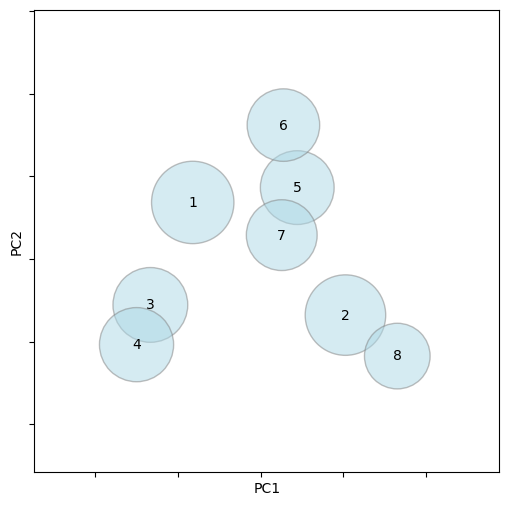

In [8]:
from src.convert_ldavis_to_pyplot import convert_ldavis_to_pyplot

convert_ldavis_to_pyplot('./results/BERTopic/bertintertopic.json', './results/BERTopic/bert_intertopic.eps')

In [7]:
# Fit the dynamic topic model, breaking dates into 20 bins
topics_over_time = topic_model.topics_over_time(tokenized_documents, all_dates, nr_bins=10)

10it [00:09,  1.07it/s]


In [8]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

p = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=8)
p

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


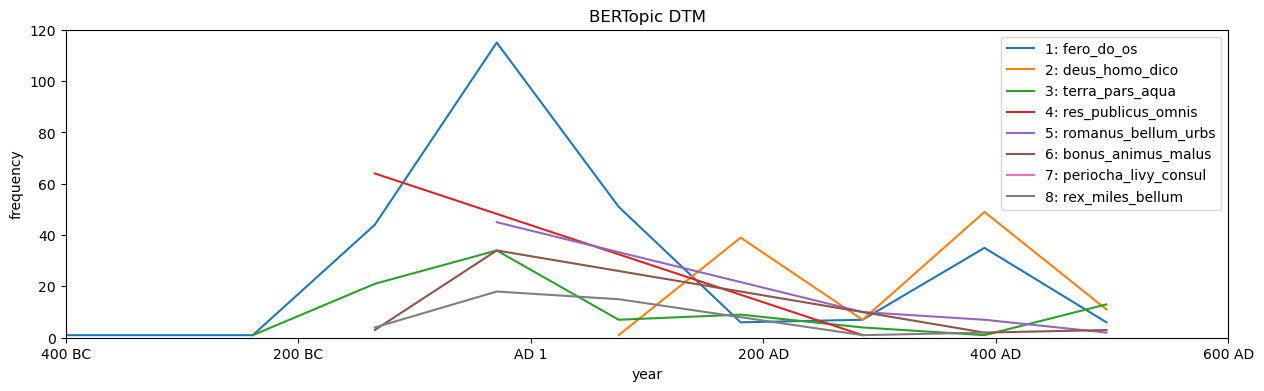

In [10]:
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (15,4)

# Plot each topic's frequency over time
for topic in range(8):
    timesteps = topics_over_time[topics_over_time['Topic'] == topic]
    label = f"{(int(timesteps['Name'].iloc[0][:1]) + 1)}" + ": " + "_".join(timesteps['Name'].iloc[0][2:].split("_")[:3])
    plt.plot(timesteps['Timestamp'], timesteps['Frequency'], label=label)

plt.axis([-400, 600, 0, 120])
    
ticks = plt.xticks()[0]
labels = []
for tick in ticks:
    if tick < 0:
        labels.append(f"{int(abs(tick))} BC")
    elif tick == 0:
        labels.append("AD 1")
    else:
        labels.append(f"{int(tick)} AD")
plt.xticks(ticks, labels)


plt.legend()
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('BERTopic DTM')

plt.savefig("bertopic_topics_over_time.eps", format = 'eps', bbox_inches='tight')

plt.show()

In [12]:
[topic[0] for topic in topic_model.get_topic(0)]

['romanus',
 'bellum',
 'hostis',
 'consul',
 'exercitus',
 'omnis',
 'urbs',
 'miles',
 'rex',
 'castrum']

In [44]:
from src.embedder import topic_coherence

total = 0
for i in range(5):
    total += topic_coherence([topic[0] for topic in topic_model.get_topic(i)])

total / 5

0.18880509389771355

In [47]:
from src.embedder import mean_pairwise_jaccard

mean_pairwise_jaccard([[topic[0] for topic in topic_model.get_topic(i)] for i in range(5)])

0.0649122807017544